In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('fake_reg.csv')

In [3]:
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


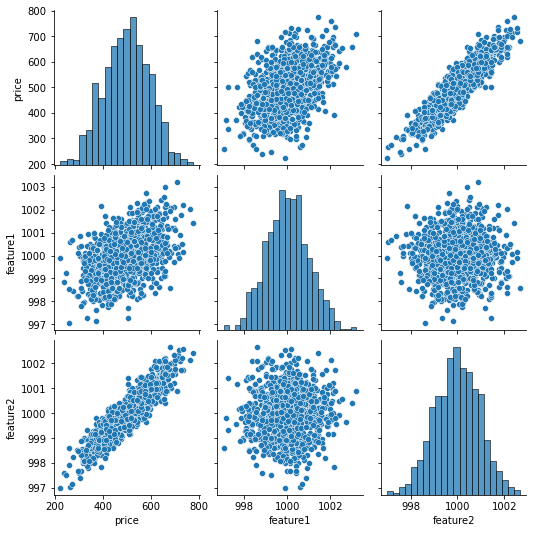

In [5]:
sns.pairplot(df)

<AxesSubplot:>

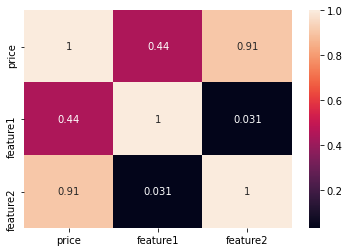

In [6]:
sns.heatmap(df.corr(), annot=True)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df[['feature1', 'feature2']].values

In [9]:
type(X)

numpy.ndarray

In [10]:
y = df['price'].values

In [11]:
type(y)

numpy.ndarray

In [12]:
import numpy as np

In [13]:
np.array([1, 2, 3, 4, 5]) #Vector

array([1, 2, 3, 4, 5])

In [14]:
x = 100 #Scalar

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

In [16]:
X_train

array([[ 998.35923902,  999.23905406],
       [ 999.25425943,  998.90357625],
       [ 998.70418871, 1001.33709245],
       ...,
       [1001.5856026 , 1000.03576386],
       [1002.08862982, 1001.02892276],
       [ 999.98167752, 1000.13010157]])

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [19]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like s

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)

MinMaxScaler()

In [22]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[0.20041747, 0.40510511],
       [0.34801238, 0.34452581],
       [0.257302  , 0.78396082],
       ...,
       [0.73246664, 0.5489719 ],
       [0.81541923, 0.72831272],
       [0.46796855, 0.56600704]])

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [26]:
from tensorflow.keras.layers import Dense, Activation

In [27]:
model = Sequential()

In [28]:
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

model.add(Dense(1)) #Output layer

In [29]:
model.compile(loss='mse')

In [30]:
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 1ms/step - loss: 256915.1094
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 256796.2969
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 256673.6406
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 256537.5000
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 256387.8906
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 256223.6719
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 256044.9844
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 255850.0312
Epoch 9/250
21/21 [==============================] - 0s 3ms/step - loss: 255634.7969
Epoch 10/250
21/21 [==============================] - 0s 4ms/step - loss: 255396.2031
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 255129.0469
Epoch 12/250
21/21 [==============================] - 0s 2ms/st

21/21 [==============================] - 0s 4ms/step - loss: 1361.4493
Epoch 98/250
21/21 [==============================] - 0s 2ms/step - loss: 1326.8418
Epoch 99/250
21/21 [==============================] - 0s 2ms/step - loss: 1292.0057
Epoch 100/250
21/21 [==============================] - 0s 2ms/step - loss: 1249.5236
Epoch 101/250
21/21 [==============================] - 0s 2ms/step - loss: 1212.3862
Epoch 102/250
21/21 [==============================] - 0s 2ms/step - loss: 1176.4998
Epoch 103/250
21/21 [==============================] - 0s 2ms/step - loss: 1141.5070
Epoch 104/250
21/21 [==============================] - 0s 2ms/step - loss: 1110.5972
Epoch 105/250
21/21 [==============================] - 0s 2ms/step - loss: 1077.2465
Epoch 106/250
21/21 [==============================] - 0s 2ms/step - loss: 1048.6423
Epoch 107/250
21/21 [==============================] - 0s 2ms/step - loss: 1012.7781
Epoch 108/250
21/21 [==============================] - 0s 2ms/step - loss: 979.16

21/21 [==============================] - 0s 2ms/step - loss: 25.9189
Epoch 196/250
21/21 [==============================] - 0s 2ms/step - loss: 25.9124
Epoch 197/250
21/21 [==============================] - 0s 2ms/step - loss: 25.9985
Epoch 198/250
21/21 [==============================] - 0s 4ms/step - loss: 26.1653
Epoch 199/250
21/21 [==============================] - 0s 3ms/step - loss: 25.6317
Epoch 200/250
21/21 [==============================] - 0s 2ms/step - loss: 26.1600
Epoch 201/250
21/21 [==============================] - 0s 2ms/step - loss: 26.1336
Epoch 202/250
21/21 [==============================] - 0s 2ms/step - loss: 25.8698
Epoch 203/250
21/21 [==============================] - 0s 2ms/step - loss: 26.2426
Epoch 204/250
21/21 [==============================] - 0s 2ms/step - loss: 25.7255
Epoch 205/250
21/21 [==============================] - 0s 2ms/step - loss: 26.4242
Epoch 206/250
21/21 [==============================] - 0s 2ms/step - loss: 25.7379
Epoch 207/250
21/2

In [31]:
lossDf = pd.DataFrame(model.history.history)

In [32]:
lossDf.head()

loss
0  256915.109375
1  256796.296875
2  256673.640625
3  256537.500000
4  256387.890625

In [33]:
lossDf.tail()

loss
245  25.747993
246  26.234089
247  25.936354
248  26.288820
249  26.117872

In [34]:
loss = model.history.history['loss']

<AxesSubplot:>

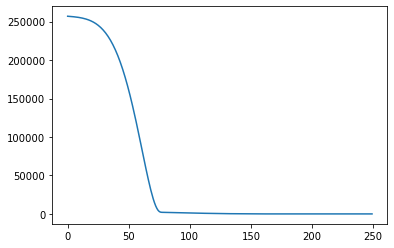

In [35]:
sns.lineplot(x=range(len(loss)), y=loss)

In [36]:
model.metrics_names

['loss']

In [37]:
model.evaluate(X_train, y_train)

21/21 [==============================] - 0s 1ms/step - loss: 25.6924


25.692386627197266

In [38]:
model.evaluate(X_train, y_train, verbose=0)

25.692386627197266

In [39]:
model.evaluate(X_test, y_test, verbose=0)

22.592247009277344

In [40]:
df.describe()

price     feature1     feature2
count  1000.000000  1000.000000  1000.000000
mean    498.673029  1000.014171   999.979847
std      93.785431     0.974018     0.948330
min     223.346793   997.058347   996.995651
25%     433.025732   999.332068   999.316106
50%     502.382117  1000.009915  1000.002243
75%     564.921588  1000.637580  1000.645380
max     774.407854  1003.207934  1002.666308

In [41]:
predictions = model.predict(X_test)
predictions

array([[502.24106],
       [533.69806],
       [613.9457 ],
       [469.76907],
       [666.9525 ],
       [550.2831 ],
       [625.0605 ],
       [495.62512],
       [459.1904 ],
       [481.7281 ],
       [539.7107 ],
       [578.7605 ],
       [506.5093 ],
       [558.4957 ],
       [280.5497 ],
       [425.1479 ],
       [508.31778],
       [449.007  ],
       [418.466  ],
       [526.34717],
       [409.21976],
       [302.67978],
       [631.80756],
       [518.6945 ],
       [538.507  ],
       [629.97546],
       [571.3186 ],
       [444.0376 ],
       [537.39996],
       [394.25217],
       [500.99628],
       [422.4102 ],
       [377.75458],
       [433.30402],
       [349.25494],
       [637.9209 ],
       [485.49155],
       [594.9008 ],
       [445.69455],
       [607.1668 ],
       [679.1562 ],
       [578.6958 ],
       [529.3053 ],
       [541.8422 ],
       [502.8161 ],
       [410.93118],
       [545.5117 ],
       [431.56644],
       [548.68884],
       [440.69672],


In [42]:
predictions.shape

(330, 1)

In [43]:
y_test

array([493.01201779, 530.27625921, 604.7965235 , 475.37241721,
       667.70856487, 556.38156913, 623.10445015, 496.06904958,
       461.14062423, 479.03778184, 535.04562659, 581.51143808,
       514.69378589, 560.13543661, 275.33337527, 421.52951149,
       500.13304581, 452.73449935, 428.31614877, 523.12643425,
       406.97496006, 305.42221221, 637.85870827, 525.55617773,
       533.48426265, 623.05449555, 564.9556813 , 445.58282142,
       531.48237221, 391.26547583, 505.74726413, 415.84564074,
       375.62302356, 425.48260511, 349.71799435, 637.77896908,
       476.19497523, 601.63849578, 434.69375374, 609.58070746,
       679.89502292, 584.38110772, 536.00593624, 551.56006043,
       508.91176483, 418.93004519, 539.68399729, 434.38654316,
       551.65009963, 446.21230389, 456.98761551, 571.70626262,
       594.68664574, 608.79918051, 543.83027912, 553.07681733,
       403.31557562, 530.98717439, 409.95257743, 512.04979227,
       367.16096642, 511.19375671, 657.71868008, 424.60

In [44]:
pred_df = pd.DataFrame(y_test, columns=['Y Test'])

In [45]:
pred_df

Y Test
0    493.012018
1    530.276259
2    604.796523
3    475.372417
4    667.708565
..          ...
325  454.028412
326  392.047269
327  494.197692
328  584.294151
329  583.065984

[330 rows x 1 columns]

In [46]:
predictions_df = pd.Series(predictions.reshape(330,))

In [47]:
predictions_df

0      502.241058
1      533.698059
2      613.945679
3      469.769073
4      666.952515
          ...    
325    449.407928
326    393.340881
327    498.152893
328    577.147827
329    593.277100
Length: 330, dtype: float32

In [48]:
pred_df = pd.concat([pred_df, predictions_df], axis=1)
pred_df

Y Test           0
0    493.012018  502.241058
1    530.276259  533.698059
2    604.796523  613.945679
3    475.372417  469.769073
4    667.708565  666.952515
..          ...         ...
325  454.028412  449.407928
326  392.047269  393.340881
327  494.197692  498.152893
328  584.294151  577.147827
329  583.065984  593.277100

[330 rows x 2 columns]

In [49]:
pred_df.columns = ['Y Test', 'Predictions']

In [50]:
pred_df

Y Test  Predictions
0    493.012018   502.241058
1    530.276259   533.698059
2    604.796523   613.945679
3    475.372417   469.769073
4    667.708565   666.952515
..          ...          ...
325  454.028412   449.407928
326  392.047269   393.340881
327  494.197692   498.152893
328  584.294151   577.147827
329  583.065984   593.277100

[330 rows x 2 columns]

<AxesSubplot:xlabel='Y Test', ylabel='Predictions'>

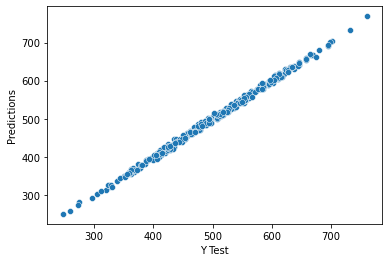

In [51]:
sns.scatterplot(x='Y Test', y='Predictions', data=pred_df)

In [52]:
pred_df['Error'] = pred_df['Y Test'] - pred_df['Predictions']

In [53]:
pred_df

Y Test  Predictions      Error
0    493.012018   502.241058  -9.229041
1    530.276259   533.698059  -3.421800
2    604.796523   613.945679  -9.149155
3    475.372417   469.769073   5.603344
4    667.708565   666.952515   0.756050
..          ...          ...        ...
325  454.028412   449.407928   4.620483
326  392.047269   393.340881  -1.293613
327  494.197692   498.152893  -3.955201
328  584.294151   577.147827   7.146324
329  583.065984   593.277100 -10.211116

[330 rows x 3 columns]

In [54]:
pred_df.describe()

Y Test  Predictions       Error
count  330.000000   330.000000  330.000000
mean   499.564002   498.744171    0.819919
std     94.024514    94.395874    4.688988
min    246.739720   250.046677  -11.695568
25%    433.185036   430.703804   -2.211803
50%    501.521260   501.618668    0.786411
75%    566.016283   568.402344    4.271578
max    760.651017   769.014404   13.472499

/Volumes/Kriti-1/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Error', ylabel='Density'>

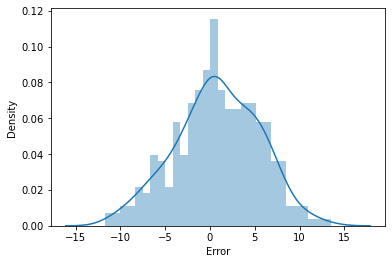

In [55]:
sns.distplot(pred_df['Error'], bins=30)

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
mean_squared_error(pred_df['Y Test'], pred_df['Predictions'])

22.59224730722257

In [58]:
mean_absolute_error(pred_df['Y Test'], pred_df['Predictions'])

3.816480530604185

In [59]:
newGem = [[998, 1000]]

In [60]:
newGem = scaler.transform(newGem)

In [61]:
newGem

array([[0.14117652, 0.5425138 ]])

In [62]:
model.predict(newGem)

array([[418.95004]], dtype=float32)

In [63]:
from tensorflow.keras.models import load_model

In [64]:
model.save('my model.h5')

In [65]:
loadedModel = load_model('my model.h5')

In [66]:
loadedModel.predict(newGem)

array([[418.95004]], dtype=float32)